데이터 전처리

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import konlpy
from konlpy.tag import Okt
import numpy as np

In [2]:
train_data=pd.read_csv('D:\\ai\\기말대체\\Data set_1.csv')
test_data=pd.read_csv('D:\\ai\\기말대체\\Data set_2.csv')

In [4]:
stopwords=['로','에','등','으로','및','과','되며','한']

In [5]:
okt=Okt()
X_train=[]
for sentence in train_data['title']:
    temp_X=[]
    temp_X=okt.morphs(sentence,stem=True)
    temp_X=[word for word in temp_X if not word in stopwords]
    X_train.append(temp_X)
X_test=[]
for sentence in test_data['title']:
    temp_X=[]
    temp_X=okt.morphs(sentence,stem=True)
    temp_X=[word for word in temp_X if not word in stopwords]
    X_test.append(temp_X)

In [6]:
print(X_train[:3])

[['CMG', '제약', '외국인', '12만', '9000', '주', '순', '매수', '주가', '058'], ['CMG', '제약', '외국인', '8만', '6000', '주', '순', '매수', '주가', '246'], ['CMG', '제약', '검색', '상위', '랭킹', '주가', '159']]


In [7]:
print(X_test[:3])

[['fnRASSI', '씨', '케이', '에이치', '900120', '1185', '상승'], ['fnRASSI', '씨', '케이', '에이치', '900120', '899', '상승'], ['코스닥', '人', '씨', '케이', '에이치', '화장품', '·', '건기', '식', '사업', '두', '마리', '토끼', '잡다']]


토큰화한 단어를 정수인코딩

In [10]:
from keras.preprocessing.text import Tokenizer
max_words=35000
tokenizer=Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train=tokenizer.texts_to_sequences(X_train)
X_test=tokenizer.texts_to_sequences(X_test)

Using TensorFlow backend.


In [11]:
print(X_train[:3])

[[105, 70, 22, 858, 583, 8, 18, 20, 4, 859], [105, 70, 22, 860, 584, 8, 18, 20, 4, 585], [105, 70, 44, 50, 51, 4, 445]]


In [12]:
print(X_test[:3])

[[12, 66, 180, 202, 1897, 1], [12, 66, 180, 202, 1897, 1], [35, 66, 180, 202, 763, 5, 662, 65, 1292]]


label data -1,0,1에 대해서 one hot encoding

In [15]:
y_train=[]
y_test=[]

for i in range(len(train_data['label'])):
    if train_data['label'].iloc[i]==1:
        y_train.append([0,0,1])
    elif train_data['label'].iloc[i]==0:
        y_train.append([0,1,0])
    elif train_data['label'].iloc[i]==-1:
        y_train.append([1,0,0])

for i in range(len(test_data['label'])):
    if test_data['label'].iloc[i]==1:
        y_test.append([0,0,1])
    elif test_data['label'].iloc[i]==0:
        y_test.append([0,1,0])
    elif test_data['label'].iloc[i]==-1:
        y_test.append([1,0,0])
        
y_train=np.array(y_train)
y_test=np.array(y_test)

In [16]:
y_train

array([[0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]])

In [17]:
y_test

array([[0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0]])

딥러닝

In [19]:
from keras.layers import Dense, LSTM, Embedding
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

np.random.seed(3)
tf.random.set_seed(3)

max_len=20
X_train=pad_sequences(X_train, maxlen=max_len)
X_test=pad_sequences(X_test,maxlen=max_len)

In [20]:
model = Sequential()
model.add(Embedding(max_words,100))
model.add(LSTM(128)) #layer에 포함되는 unit개수가 128개일때 대체로 괜찮은가보다
model.add(Dense(3, activation='softmax'))  # 활성화 함수 softmax 사용

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
hist1 = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=2)

C:\Users\Administrator\.conda\envs\ai\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 946 samples, validate on 949 samples
Epoch 1/100
 - 2s - loss: 0.8868 - accuracy: 0.6205 - val_loss: 0.6110 - val_accuracy: 0.7113
Epoch 2/100
 - 2s - loss: 0.4716 - accuracy: 0.8182 - val_loss: 0.3931 - val_accuracy: 0.8335
Epoch 3/100
 - 2s - loss: 0.2325 - accuracy: 0.9186 - val_loss: 0.2972 - val_accuracy: 0.8851
Epoch 4/100
 - 2s - loss: 0.0999 - accuracy: 0.9641 - val_loss: 0.3483 - val_accuracy: 0.8894
Epoch 5/100
 - 2s - loss: 0.0388 - accuracy: 0.9937 - val_loss: 0.7937 - val_accuracy: 0.8440
Epoch 6/100
 - 2s - loss: 0.0565 - accuracy: 0.9926 - val_loss: 0.3102 - val_accuracy: 0.8988
Epoch 7/100
 - 2s - loss: 0.0192 - accuracy: 0.9968 - val_loss: 0.3091 - val_accuracy: 0.9041
Epoch 8/100
 - 2s - loss: 0.0050 - accuracy: 0.9989 - val_loss: 0.3308 - val_accuracy: 0.9009
Epoch 9/100
 - 2s - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.4181 - val_accuracy: 0.8894
Epoch 10/100
 - 2s - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.3811 - val_accuracy: 0.8988
Epoch 11/100


Epoch 84/100
 - 2s - loss: 8.6127e-06 - accuracy: 1.0000 - val_loss: 0.7910 - val_accuracy: 0.8820
Epoch 85/100
 - 2s - loss: 8.6574e-06 - accuracy: 1.0000 - val_loss: 0.7985 - val_accuracy: 0.8809
Epoch 86/100
 - 2s - loss: 7.7815e-06 - accuracy: 1.0000 - val_loss: 0.8085 - val_accuracy: 0.8778
Epoch 87/100
 - 2s - loss: 7.9807e-06 - accuracy: 1.0000 - val_loss: 0.8078 - val_accuracy: 0.8809
Epoch 88/100
 - 2s - loss: 7.6403e-06 - accuracy: 1.0000 - val_loss: 0.7932 - val_accuracy: 0.8851
Epoch 89/100
 - 2s - loss: 9.0309e-06 - accuracy: 1.0000 - val_loss: 0.8081 - val_accuracy: 0.8809
Epoch 90/100
 - 2s - loss: 7.1442e-06 - accuracy: 1.0000 - val_loss: 0.8052 - val_accuracy: 0.8799
Epoch 91/100
 - 2s - loss: 6.7127e-06 - accuracy: 1.0000 - val_loss: 0.8099 - val_accuracy: 0.8809
Epoch 92/100
 - 2s - loss: 8.1093e-06 - accuracy: 1.0000 - val_loss: 0.8038 - val_accuracy: 0.8809
Epoch 93/100
 - 2s - loss: 7.4478e-06 - accuracy: 1.0000 - val_loss: 0.8099 - val_accuracy: 0.8809
Epoch 94/1

In [22]:
print('정확도: {:.2f}%'.format(model.evaluate(X_test,y_test)[1]*100))

949/949 [==============================] - 0s 127us/step
정확도: 87.99%


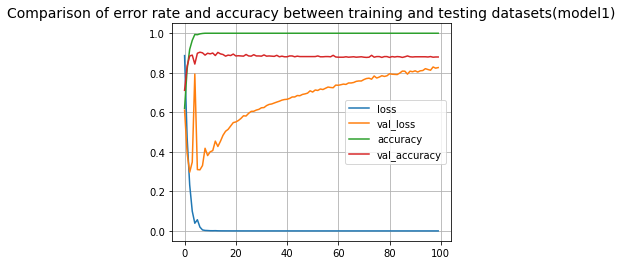

In [23]:
import matplotlib.pyplot as plt
#import matplotlib.font_manager as fm
#fm.get_fontconfig_fonts()
#font_path="D:\\ai\\기말대체\\NanumFontSetup_TTF_GOTHIC\\NanumGothic.ttf"
#font_name = fm.FontProperties(fname=font_path).get_name()
#plt.rc('font', family=font_name, size=12) 
plt.figure(figsize=(5,4))
plt.title('Comparison of error rate and accuracy between training and testing datasets(model1)', fontsize=14)

plt.plot(hist1.history['loss'])      # 학습 데이터셋의 loss   -> loss 
plt.plot(hist1.history['val_loss'])  # 테스트 데이터셋의 loss -> val_loss

plt.plot(hist1.history['accuracy'])      # 학습 데이터셋의 accuracy    -> accuracy 
plt.plot(hist1.history['val_accuracy'])  # 테스트 데이터셋의 accuracy  -> val_accuracy 

plt.legend(['loss','val_loss','accuracy', 'val_accuracy' ])     # 범례
plt.grid()
plt.show()

In [24]:
model.save('model1.h5')  